In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import numpy as np
import seaborn as sns

In [5]:
df=pd.read_csv('C:\\Users\\sahib pratap\\Downloads\\Book 1.csv')

Text(0, 0.5, 'Unemployment Rate(%)')

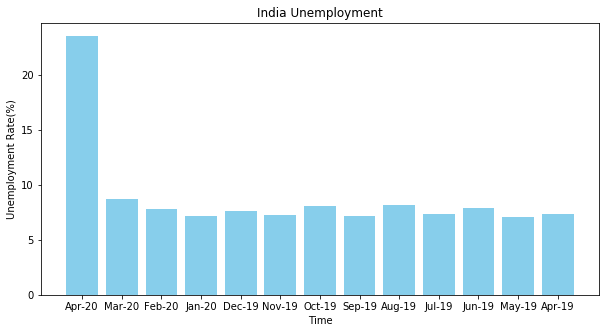

In [7]:
plt.figure(figsize=(10,5))
plt.bar(df['Month'],df['Unemployment Rate(%)'],color='skyblue')
plt.title('India Unemployment')  
plt.xlabel('Time')
plt.ylabel('Unemployment Rate(%)')

Text(0, 0.5, 'Unemployment Rate(%)')

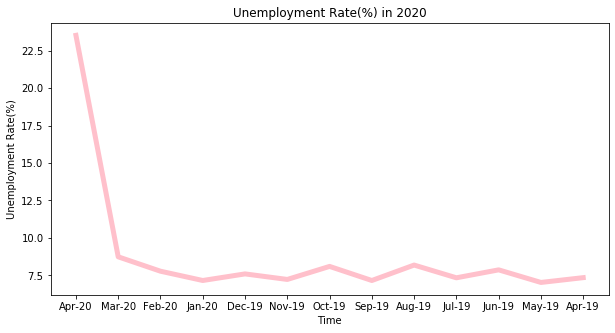

In [10]:
fig=plt.figure(figsize=(10,5))
plt.plot(df['Month'],df['Unemployment Rate(%)'],color='pink',linewidth=5)
plt.title('Unemployment Rate(%) in 2020')
plt.xlabel('Time')
plt.ylabel('Unemployment Rate(%)')

# Collecting live data  using web scrapping

In [11]:
web_content = requests.get('https://unemploymentinindia.cmie.com/').text

In [12]:
# parse the html content
soup = BeautifulSoup(web_content, "html.parser")
# remove any newlines and extra spaces from left and right
extract_contents = lambda row: [x.text.replace('\n', '') for x in row]
stats = [] # initialize stats
all_rows = soup.find_all('tr') # find all table rows 

for row in all_rows: 
    stat = extract_contents(row.find_all('td')) # find all data cells  
    # notice that the data that we require is now a list of length 5
    if len(stat) == 2: 
        stats.append(stat)

#now convert the data into a pandas dataframe for further processing
new_cols = ["States/UT", "Percentage"]
state_data = pd.DataFrame(data = stats, columns = new_cols)
state_data.drop(state_data.head(8).index,inplace=True)
state_data.drop(state_data.tail(8).index,inplace=True)
state_data

,States/UT,Percentage
8,Andhra Pradesh,20.5
9,Assam,11.1
10,Bihar,46.6
11,Chhattisgarh,3.4
12,Delhi,16.7
13,Goa,13.3
14,Gujarat,18.7
15,Haryana,43.2
16,Himachal Pradesh,2.2
17,Jharkhand,47.1


In [13]:
state_data['Percentage']=state_data['Percentage'].map(float)

# State-wise COVID-19 unemployment in india

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 9 Text xticklabel objects>)

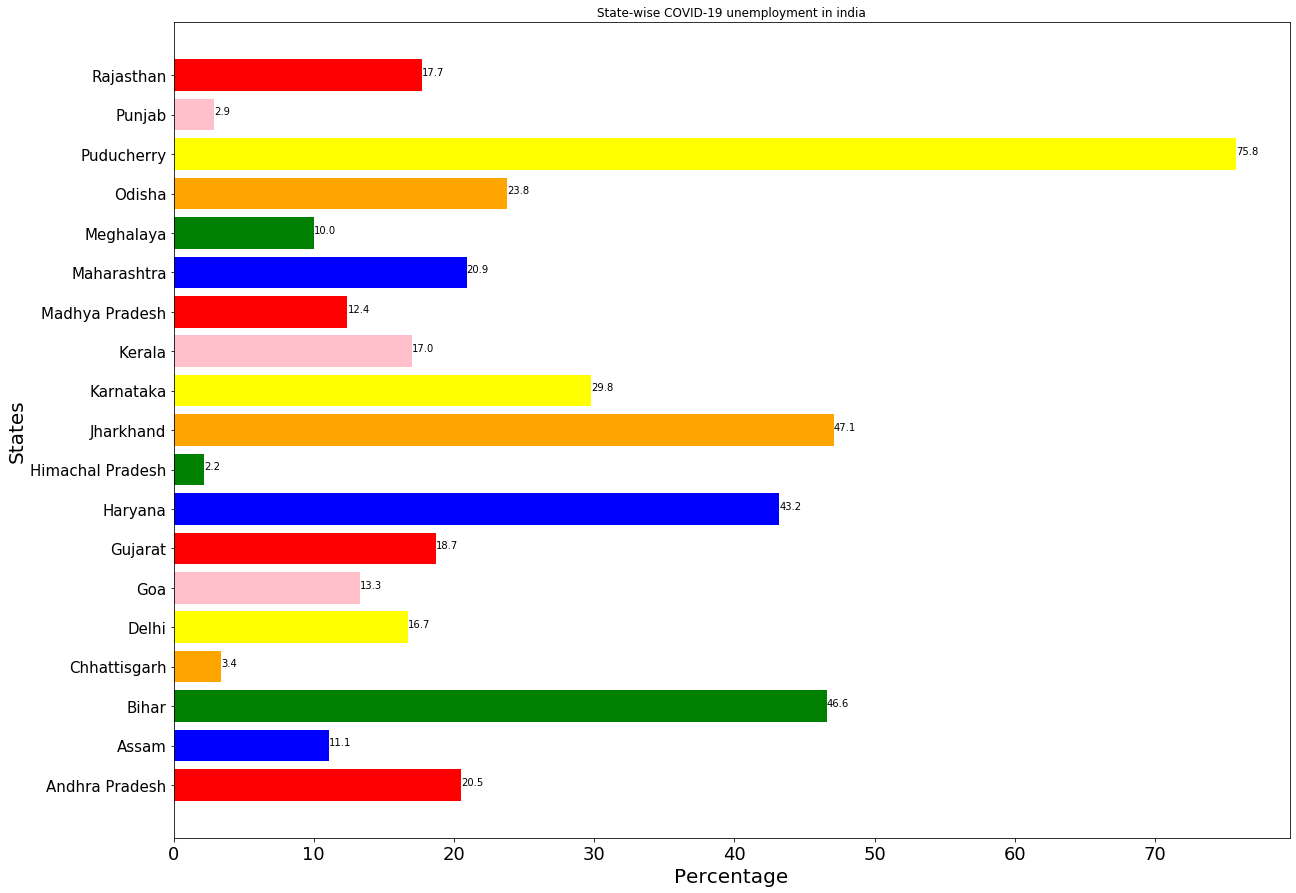

In [14]:
plt.figure(figsize=(20,15))
plt.barh(state_data['States/UT'],state_data['Percentage'],color=['red','blue','green','orange','yellow','pink'])
for index, value in enumerate(state_data['Percentage']):
    plt.text(value, index, str(value))
plt.title('State-wise COVID-19 unemployment in india')  
plt.xlabel('Percentage',fontsize=20)
plt.ylabel('States',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=18)

# World unemployment in 2020

In [15]:
w_unemp=pd.read_csv('C:\\Users\\sahib pratap\\Downloads\\quarantine time\\unemp.csv')

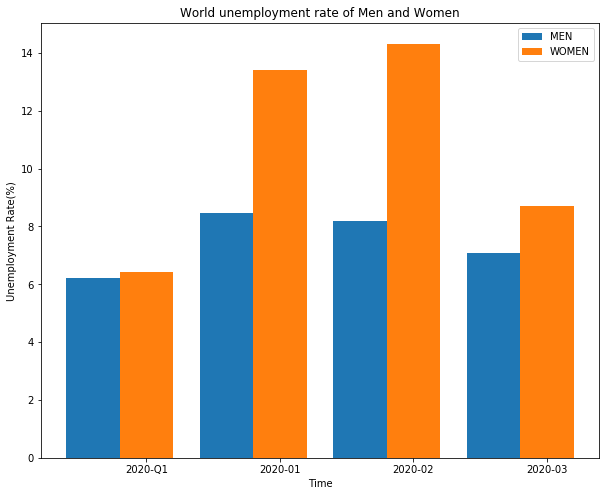

In [16]:
v_men=w_unemp[(w_unemp['SUBJECT']=='MEN') & (w_unemp['TIME']>='2020')][['TIME','Value']]
v_women=w_unemp[(w_unemp['TIME']>='2020')&(w_unemp['SUBJECT']=='WOMEN')][['TIME','Value']]
plt.figure(figsize=(10,8))
plt.bar(v_men['TIME'],v_men['Value'],width= -0.6,align='edge',label='MEN')
plt.bar(v_women['TIME'],v_women['Value'],width=0.4,label='WOMEN')
plt.xlabel('Time')
plt.ylabel('Unemployment Rate(%)')
plt.title("World unemployment rate of Men and Women")
plt.legend()

Text(0.5, 1.0, 'Unemployment')

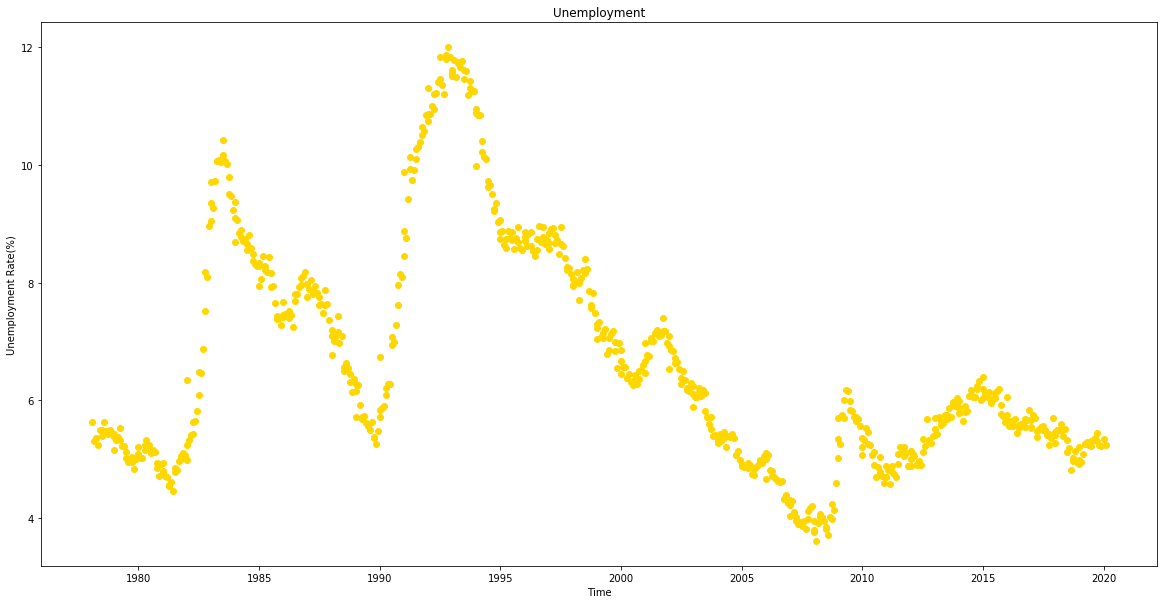

In [18]:
unemp=pd.read_csv('C:\\Users\\sahib pratap\\Downloads\\quarantine time\\unemp.csv')
grouped=unemp.groupby('LOCATION')
aus=grouped.get_group('AUS')
y=aus.loc[aus['SUBJECT']=='MEN']['Value']
ti=aus.loc[aus['SUBJECT']=='MEN']['TIME']
x=pd.to_datetime(ti)
plt.figure(figsize=(20,10))
plt.scatter(x,y,color='gold')
plt.xlabel('Time')
plt.ylabel('Unemployment Rate(%)')
plt.title('Unemployment')

# World GDP

Text(0.5, 1.0, 'World GDP percentage')

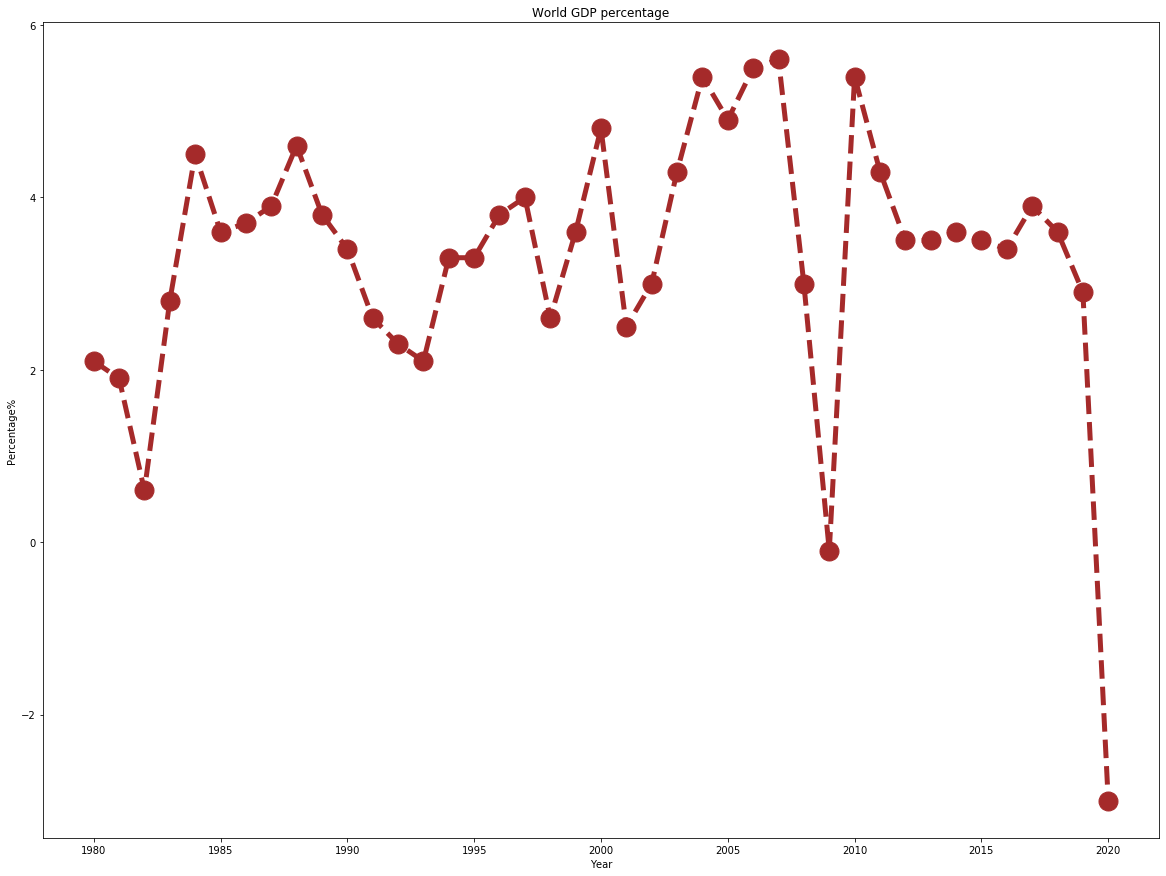

In [19]:
w_gdp = pd.read_csv('C:\\Users\\sahib pratap\\Downloads\\world_gdp.csv')
w_gdp=w_gdp.transpose()
w_gdp.drop(w_gdp.head(1).index,inplace=True)
w_gdp.drop(w_gdp.tail(1).index,inplace=True)
x=pd.to_datetime(w_gdp.index)
y=w_gdp[0]
plt.figure(figsize=(20,15))
plt.plot(x,y,marker='o',markersize=19,linestyle='dashed',color='brown',linewidth=5)
plt.xlabel('Year')
plt.ylabel('Percentage%')
plt.title('World GDP percentage')